In [172]:
import numpy as np
import matplotlib.pyplot as plt
freq = np.linspace(0.00001, 1, 10000)
C=299792458.0 
# Effective Beatnote freq in Hz [18 MHz]
fhet_eff=18000000.0
#Sidenad Freq in Hz [2.4 GHz]
freq_sb=2400000000.0
# Wavelength and arm length in [1064.5 nm]
Lambda=1.0645e-06
#Arm length in m [2.5 Gm]
L_arm=2500000000.0
pi=np.pi
# Pilot Tone Timing Stability to 2.4GHz Sideband due to FDS and PMS to Laser harness attributes(s Hz^-0.5)
Timing_Stability_FDS=35e-15*(1+(2e-3/freq)**4)**0.5
Timing_Stability_PMS=35e-15*(1+(2e-3/freq)**4)**0.5
#TDI XX H2 transfer function []
H2_xx=64*np.sin(L_arm/C*2*pi*freq)**2*np.sin(L_arm/C*4*pi*freq)**2
#RF Optical Modulation Noise (rad Hz^-1) 
ModPhaseErr=(60e-6*(1+(7e-2/freq)))**2
#RF Optical Modulation Noise in timing jitter attributes (s Hz^-0.5)
RF_ModNoise=(ModPhaseErr*(1/(2*pi*freq_sb)**2))**0.5
# 2.4 GHz sidebands relative stability attributes (s Hz^-0.5)
SB_RelStability=RF_ModNoise+Timing_Stability_FDS+Timing_Stability_PMS
# Allocation for SideBand Relative Stability (s Hz^-0.5)
Sideband_Allocation=50e-15*(1+(2e-3/freq)**4)**0.5
# Modulation error [XX] attributes  (m Hz^-0.5)    
ModErr=(16 * np.sin(L_arm*2*pi*freq/C)**2*np.sin(2*L_arm*2*pi*freq/C)**2*(6*fhet_eff**2+12*fhet_eff**2*np.sin(L_arm*2*pi*freq/C)**2)*SB_RelStability**2*Lambda**2)**0.5
# Mod Error Allocation (m Hz^-0.5)
ModErr_Allocation=(H2_xx)**0.5*3.3e-12*(1+(2e-3/freq)**4)**0.5

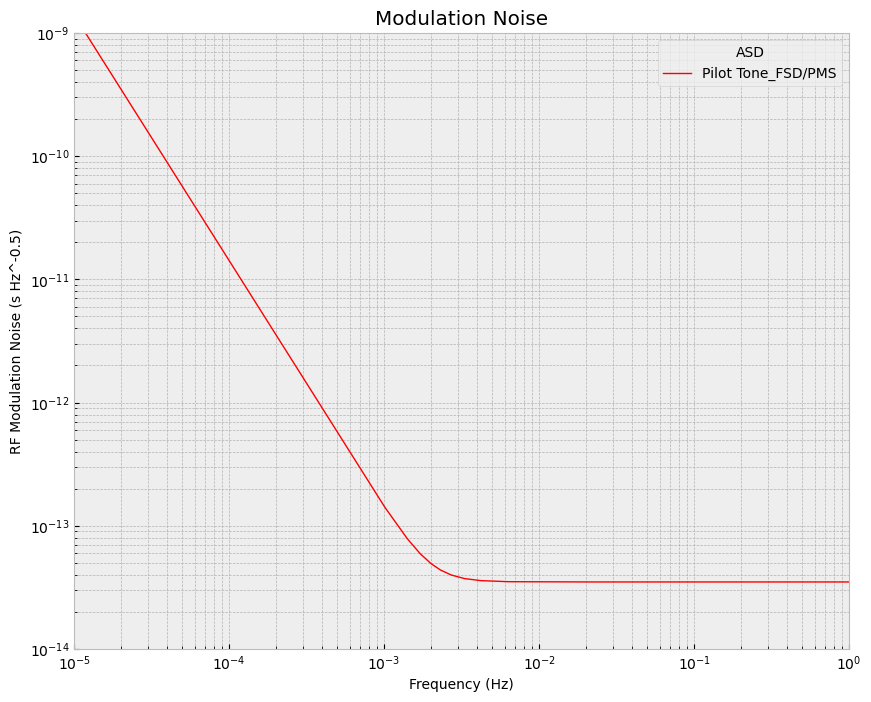

In [173]:
plt.figure(figsize=(10,8))
plt.plot(freq, Timing_Stability_FDS, 'r-',label = "Pilot Tone_FSD/PMS", linewidth=1.0)
#plt.plot(freq, RF_ModNoise, 'b-',label = "RF_ModNoise", linewidth=1.0)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-14, 1e-9)
plt.xlim(1e-5, 1)
plt.title("Modulation Noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("RF Modulation Noise (s Hz^-0.5)")
plt.legend(title = "ASD")
plt.grid(visible=None, which='minor', axis='both')
plt.show()

In [174]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://perf-lisa.in2p3.fr/figs/e41a1d9a-0f74-4a0b-9943-746ba5eeb33f/Pilot_Tone_Timing_Stability_to_2.4GHz_Sideband_due_to_PMS_to_Laser_harness_AllocMBE.png")

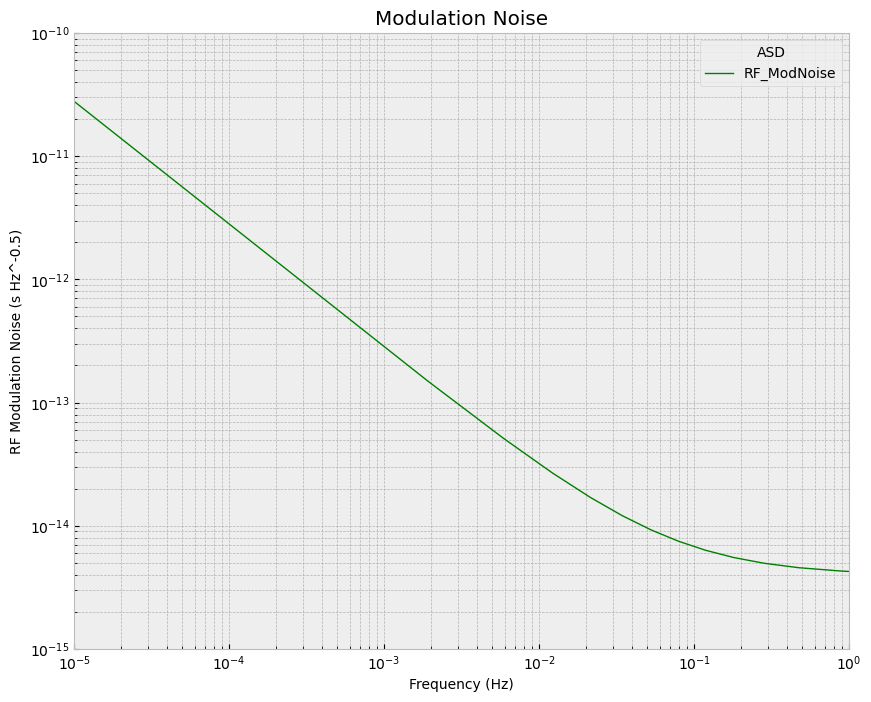

In [175]:
plt.figure(figsize=(10,8))
#plt.plot(freq, Timing_Stability_FDS, 'r-',label = "Pilot Tone_FSD/PMS", linewidth=1.0)
plt.plot(freq, RF_ModNoise, 'g-',label = "RF_ModNoise", linewidth=1.0)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-15, 1e-10)
plt.xlim(1e-5, 1)
plt.title("Modulation Noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("RF Modulation Noise (s Hz^-0.5)")
plt.legend(title = "ASD")
plt.grid(visible=None, which='minor', axis='both')
plt.show()

In [176]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://perf-lisa.in2p3.fr/figs/e41a1d9a-0f74-4a0b-9943-746ba5eeb33f/RF_Optical_Modulation_Noise_in_timing_jitter_AllocMBE.png")

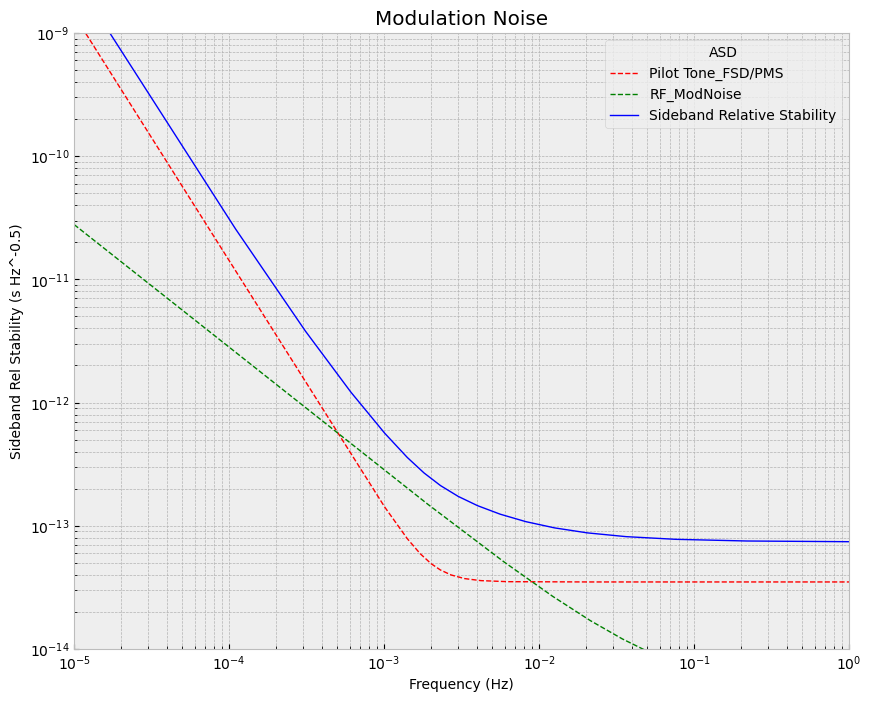

In [177]:
plt.figure(figsize=(10,8))
plt.plot(freq, Timing_Stability_FDS, 'r--',label = "Pilot Tone_FSD/PMS", linewidth=1.0)
#plt.plot(freq, Timing_Stability_PMS, 'k-',label = "Pilot Tone_PMS", linewidth=0.5)
plt.plot(freq, RF_ModNoise, 'g--',label = "RF_ModNoise", linewidth=1.0)
plt.plot(freq, SB_RelStability, 'b-',label = "Sideband Relative Stability", linewidth=1.0)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-14, 1e-9)
plt.xlim(1e-5, 1)
plt.title("Modulation Noise")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Sideband Rel Stability (s Hz^-0.5)")
plt.legend(title = "ASD")
plt.grid(visible=None, which='minor', axis='both')
plt.show()

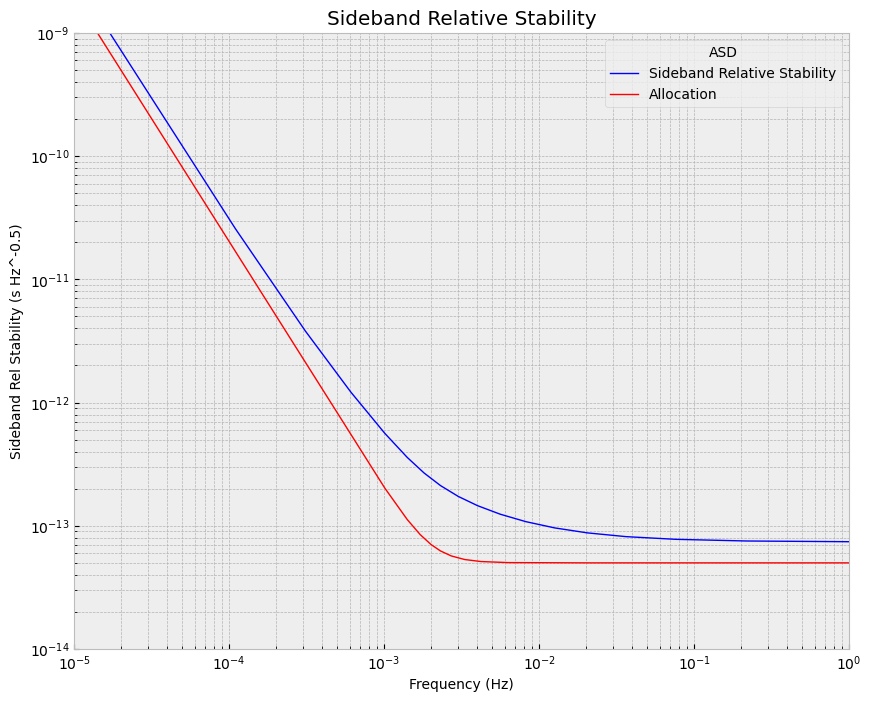

In [178]:
plt.figure(figsize=(10,8))
plt.plot(freq, SB_RelStability, 'b-',label = "Sideband Relative Stability", linewidth=1.0)
plt.plot(freq, Sideband_Allocation, 'r-',label = "Allocation", linewidth=1.0)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-14, 1e-9)
plt.xlim(1e-5, 1)
plt.title("Sideband Relative Stability")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Sideband Rel Stability (s Hz^-0.5)")
plt.legend(title = "ASD")
plt.grid(visible=None, which='minor', axis='both')
plt.show()

In [179]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://perf-lisa.in2p3.fr/figs/d34674d6-6a83-43b7-82fb-e25a5a38d251/2.4_GHz_sidebands_relative_stability_AllocMBE.png")

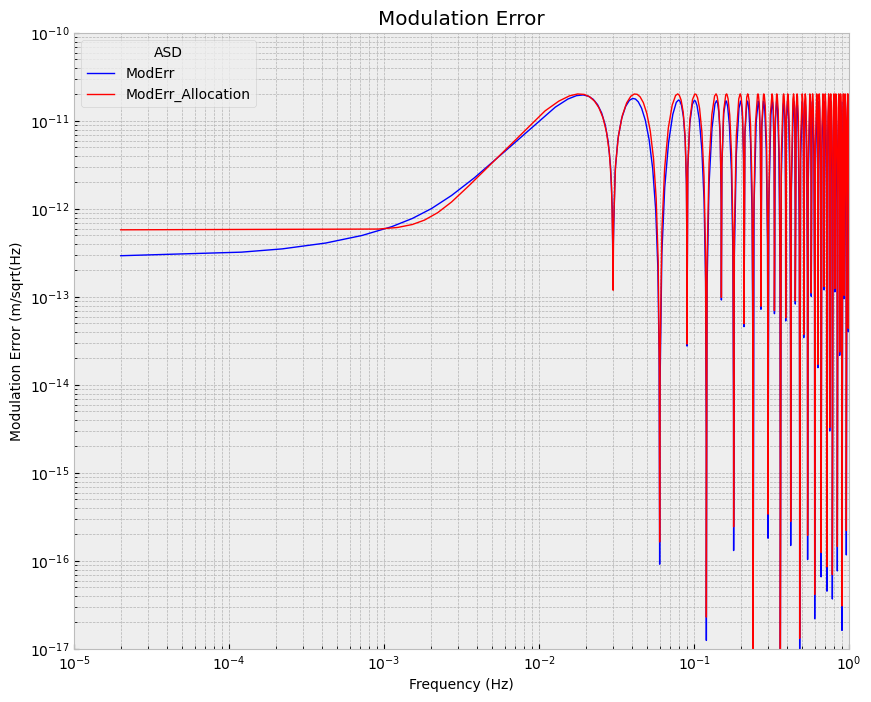

In [184]:
plt.figure(figsize=(10,8))
plt.plot(freq, ModErr, 'b-',label = "ModErr", linewidth=1.0)
plt.plot(freq, ModErr_Allocation, 'r-',label = "ModErr_Allocation", linewidth=1.0)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-17, 1e-10)
plt.xlim(1e-5, 1)
plt.title("Modulation Error")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Modulation Error (m/sqrt(Hz)")
plt.legend(title = "ASD")
plt.grid(visible=None, which='minor', axis='both')
plt.show()

In [181]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://perf-lisa.in2p3.fr/figs/e41a1d9a-0f74-4a0b-9943-746ba5eeb33f/Modulation_error_[XX]_AllocMBE.png")

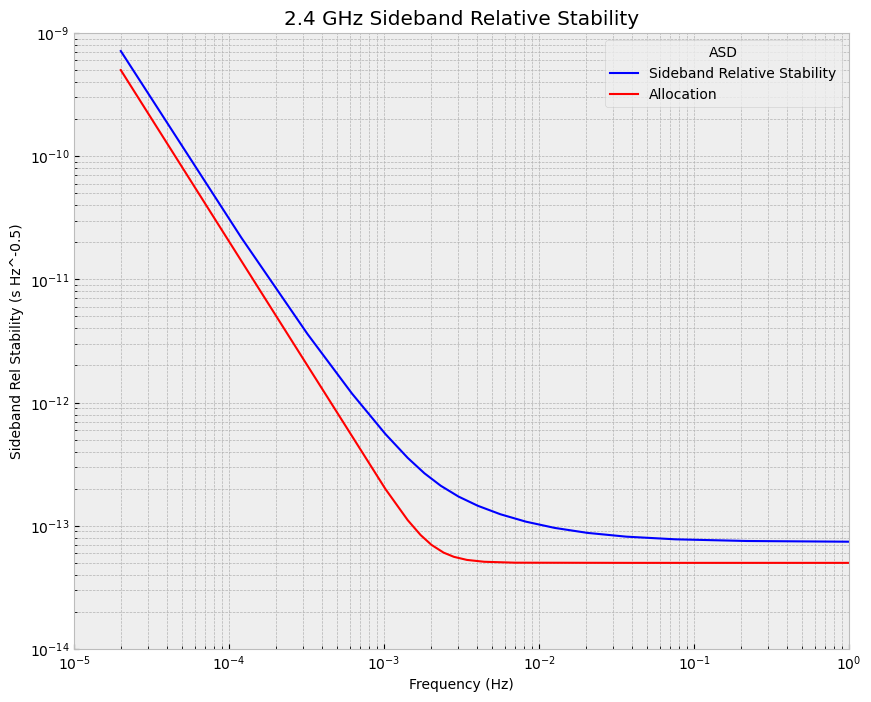

In [182]:
import numpy as np
import matplotlib.pyplot as plt
freq = np.linspace(0.00002, 1, 10000)
C=299792458.0 
# Effective Beatnote freq in Hz [18 MHz]
fhet_eff=18000000.0
#Sidenad Freq in Hz [2.4 GHz]
freq_sb=2400000000.0
# Wavelength and arm length in [1064.5 nm]
Lambda=1.0645e-06
#Arm length in m [2.5 Gm]
L_arm=2500000000.0
pi=np.pi
# Pilot Tone Timing Stability to 2.4GHz Sideband due to FDS and PMS to Laser harness attributes(s Hz^-0.5)
Timing_Stability_FDS=35e-15*(1+(2e-3/freq)**4)**0.5
Timing_Stability_PMS=35e-15*(1+(2e-3/freq)**4)**0.5
#TDI XX H2 transfer function []
H2_xx=64*np.sin(L_arm/C*2*pi*freq)**2*np.sin(L_arm/C*4*pi*freq)**2
#RF Optical Modulation Noise (rad Hz^-1) 
ModPhaseErr=(60e-6*(1+(7e-2/freq)))**2
#RF Optical Modulation Noise in timing jitter attributes (s Hz^-0.5)
RF_ModNoise=(ModPhaseErr*(1/(2*pi*freq_sb)**2))**0.5
# 2.4 GHz sidebands relative stability attributes (s Hz^-0.5)
SB_RelStability=RF_ModNoise+Timing_Stability_FDS+Timing_Stability_PMS
# Allocation for SideBand Relative Stability (s Hz^-0.5)
Sideband_Allocation=50e-15*(1+(2e-3/freq)**4)**0.5
# Modulation error [XX] attributes  (m Hz^-0.5)    
ModErr=(16 * np.sin(L_arm*2*pi*freq/C)**2*np.sin(2*L_arm*2*pi*freq/C)**2*(6*fhet_eff**2+12*fhet_eff**2*np.sin(L_arm*2*pi*freq/C)**2)*SB_RelStability**2*Lambda**2)**0.5
# Mod Error Allocation (m Hz^-0.5)
ModErr_Allocation=(H2_xx)**0.5*3.3e-12*(1+(2e-3/freq)**4)**0.5
plt.figure(figsize=(10,8))
plt.plot(freq, SB_RelStability, 'b-',label = "Sideband Relative Stability", linewidth=1.5)
plt.plot(freq, Sideband_Allocation, 'r-',label = "Allocation", linewidth=1.5)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-14, 1e-9)
plt.xlim(1e-5, 1)
plt.title("2.4 GHz Sideband Relative Stability")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Sideband Rel Stability (s Hz^-0.5)")
plt.legend(title = "ASD")
plt.grid(visible=None, which='minor', axis='both')
#plt.grid(color='snow', linestyle='--', linewidth=1)
#plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [183]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://perf-lisa.in2p3.fr/figs/d34674d6-6a83-43b7-82fb-e25a5a38d251/2.4_GHz_sidebands_relative_stability_AllocMBE.png")